# Example notebook to show how to work with sxs waveforms

In [1]:
from gw_eccentricity import load_waveform
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import matplotlib.pyplot as plt
from gw_eccentricity.load_data import get_available_waveform_origins, get_load_waveform_defaults
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# function to load modes from sxs catalog formatted waveform file
load_waveform?

Signature: load_waveform(origin='LAL', **kwargs)
Docstring:
Load waveform.

parameters:
----------
origin: str
    The origin of the waveform to be generated/loaded. This can be one of
    - "LAL": Compute waveform by a call to the LAL-library.
    - "LVCNR": Import waveform by reading a file in the LVCNR-data format.
    - "LVCNR_hack": Reading LVCNR-data format file using h5py.
        NOTE: This is NOT the recommended way to load lvcnr file.
    - "SXSCatalog": Import waveform by reading a file in the SXS catalog
        format.
        (see https://data.black-holes.org/waveforms/documentation.html)
    - "EOB": Import EOB waveform generated using SEOBNRv4EHM
        (see arxiv:2112.06952).
    - "EMRI": Import EMRI waveform generated by Maarten.

    In each case, the `kwargs` dictionary provides the needed
    information to uniquely specify the waveform. Depending on the
    `origin`, a waveform loading function is called as assigned in
    the dictionary obtained using
    `load

In [3]:
get_available_waveform_origins()

{'LAL': <function gw_eccentricity.load_data.load_LAL_waveform(**kwargs)>,
 'LVCNR': <function gw_eccentricity.load_data.load_lvcnr_waveform(**kwargs)>,
 'LVCNR_hack': <function gw_eccentricity.load_data.load_lvcnr_hack(**kwargs)>,
 'SXSCatalog': <function gw_eccentricity.load_data.load_sxs_catalogformat(**kwargs)>,
 'EOB': <function gw_eccentricity.load_data.load_EOB_waveform(**kwargs)>,
 'EMRI': <function gw_eccentricity.load_data.load_EMRI_waveform(**kwargs)>}

In [4]:
get_load_waveform_defaults("SXSCatalog")

{'filepath': None,
 'metadata_path': None,
 'deltaTOverM': 0.1,
 'include_zero_ecc': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'num_orbits_to_remove_as_junk': 2,
 'mode_array': [(2, 2)],
 'extrap_order': 2}

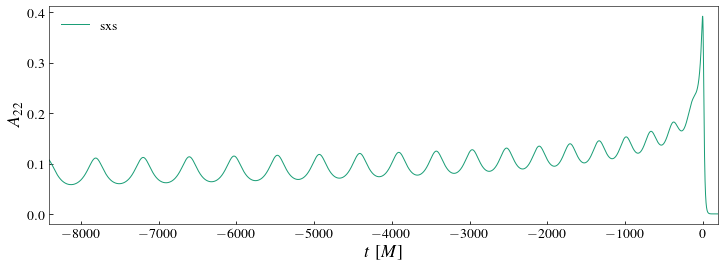

In [5]:
# Load nr data in sxs catalog format using only filepath and using defaults for other args
# kwargs = {"filepath": "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}
kwargs = {"filepath": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}

dataDict = load_waveform(origin="SXSCatalog", **kwargs)

# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# measure eccentricity using `AmplitudeFits` method

(<Figure size 864x288 with 1 Axes>,
 <AxesSubplot:xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

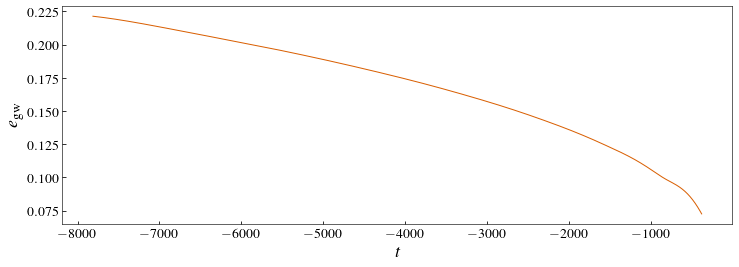

In [6]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="AmplitudeFits")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()

# Measure eccentricity with `ResidualAmplitude`

This time we need to load zeroecc data as well to compute the residual amplitude. This is done by providing additional kwargs to the waveform laodig function

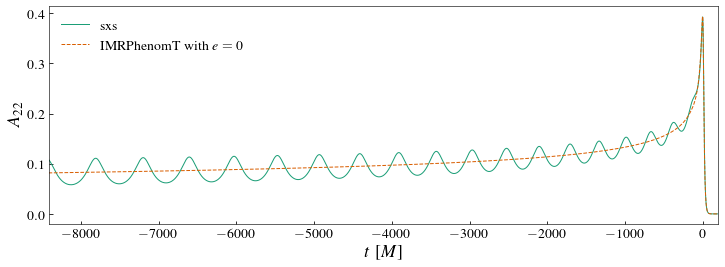

In [7]:
# filepath = "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
# metadata_path = "/home/arif/nr_data/metadata.txt"
filepath = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True,
         "metadata_path": metadata_path}
dataDict = load_waveform(origin="SXSCatalog", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

/home1/md.shaikh/Eccentricity/gw_eccentricity/eccDefinition.py:218: UserWarning: kw params_dict is not a recognized key word in dataDict.
  debug_message(


(<Figure size 864x288 with 1 Axes>,
 <AxesSubplot:xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

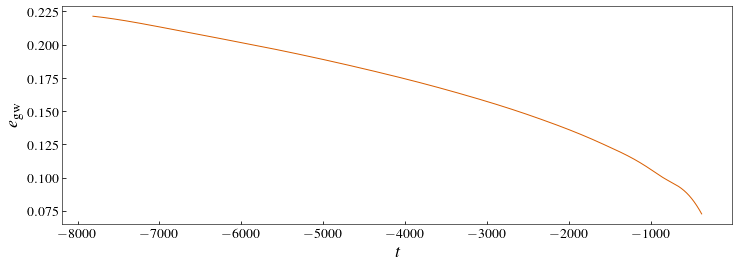

In [8]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="ResidualAmplitude")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()

# Load lvcnr

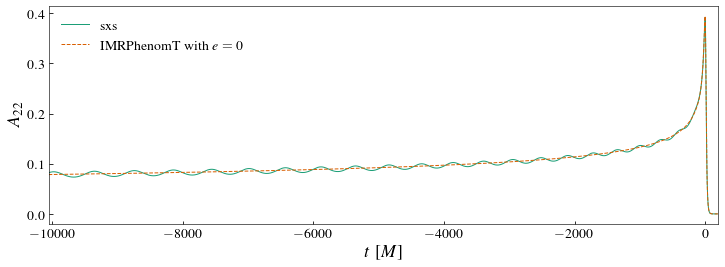

In [9]:
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q1_0_0_e01_D20_Res3.h5"
metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True}
dataDict = load_waveform(origin="LVCNR", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# Load lvcnr_hack

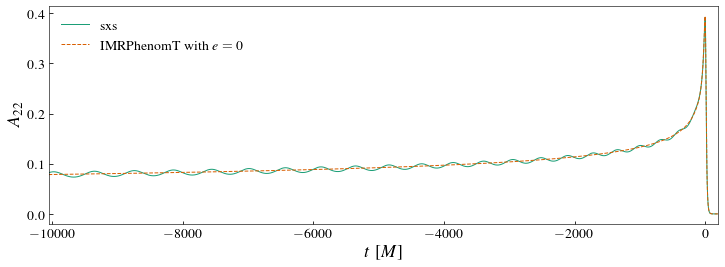

In [14]:
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q1_0_0_e01_D20_Res3.h5"
metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True}
dataDict = load_waveform("LVCNR_hack", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

In [15]:
from gw_eccentricity.load_data import get_defaults_for_nr

In [16]:
get_defaults_for_nr()

{'filepath': None,
 'deltaTOverM': 0.1,
 'Momega0': 0.0,
 'include_zero_ecc': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'metadata_path': None,
 'num_orbits_to_remove_as_junk': 2,
 'mode_array': [(2, 2)],
 'extrap_order': 2}

## Load EOB

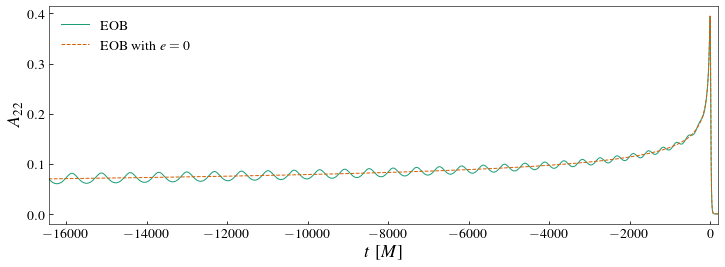

In [28]:
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1031389768_Momega00.010_meanAno1.571.h5"
filepath_zeroecc = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.0000000000_Momega00.002_meanAno0.000.h5"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True,
         "filepath_zero_ecc": filepath_zeroecc}
dataDict = load_waveform("EOB", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="EOB")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"EOB with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# Load EMRI

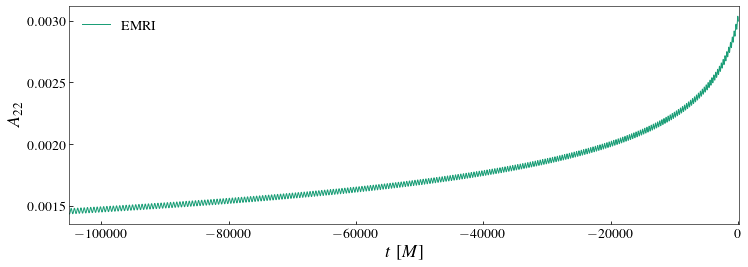

In [46]:
kwargs = {"filepath": "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/EMRI/q100/EMRI_0PA_q100_e0.010.h5",
              "include_zero_ecc": True,
              "start_time" :-105000,
              "deltaT": 0.08}
dataDict = load_waveform("EMRI", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="EMRI")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")